Dataset:

https://www.moanaproject.org/hindcast


Pick one file from processed_sfc and one file from monthly_avg.

In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
! pip install netCDF4
! pip install basemap
! pip install https://github.com/matplotlib/basemap/archive/master.zip # Alternative to basemap

     |████████████████████████████████| 4.7MB 5.6MB/s 
     |████████████████████████████████| 317kB 42.7MB/s 
ERROR: Could not find a version that satisfies the requirement basemap (from versions: none)
ERROR: No matching distribution found for basemap
     / 152.2MB 467kB/s
     |████████████████████████████████| 6.5MB 4.3MB/s 
     |████████████████████████████████| 225kB 43.3MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759562 sha256=a8a45c3d229093005b35321f3b196190a93aa267bab9ac2920eaa08516b39103
  Stored in directory: /tmp/pip-ephem-wheel-cache-0qpad74z/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=76d927e3c7421754e33a7e87b3b632aaa4c6bbd0a850343d39325ae3899f9a13
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp


Read NC files.

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

SFC = xr.open_dataset("/gdrive/MyDrive/processed_sfc_nz5km20171101_00z_surf.nc", decode_times=False)

SFC

<xarray.Dataset>
Dimensions:  (lat: 467, lon: 397, time: 241)
Coordinates:
  * time     (time) float64 2.472e+08 2.472e+08 ... 2.498e+08 2.498e+08
  * lon      (lon) float64 161.0 161.1 161.2 161.2 ... 184.8 184.8 184.9 185.0
  * lat      (lat) float64 -51.98 -51.94 -51.91 -51.87 ... -31.13 -31.08 -31.03
Data variables:
    ssh      (time, lat, lon) float32 ...
    sst      (time, lat, lon) float32 ...
    us       (time, lat, lon) float32 ...
    um       (time, lat, lon) float32 ...
    vs       (time, lat, lon) float32 ...
    vm       (time, lat, lon) float32 ...
    dep      (lat, lon) float32 ...
Attributes:
    type:                      MSL ROMS Surface output file
    history:                   Thu Jan 30 04:47:42 2020: ncap2 -D 2 -O -s tim...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1

Time:

(Unix time for Jan 01 2010 00:00:00 GMT+13: 1262257200)

start: Tue Nov 01 2017 00:00:00 GMT+13

end: Thu Dec 01 2017 00:00:00 GMT+13

Area:

A rectangle defined by (-51.98, 161.0) and (-31.03, 185.0) except ground areas. 

Variables:

There are (time * lat * lon = 44681159) values held by each variable.

In [4]:
sst = SFC.variables['sst'][:] 

In [5]:
print(sst[0])

<xarray.Variable (lat: 467, lon: 397)>
[185399 values with dtype=float32]
Attributes:
    long_name:      Sea surface temperature
    standard_name:  sea_surface_temperature
    units:          degC


Plot maps at one time! (spatial)

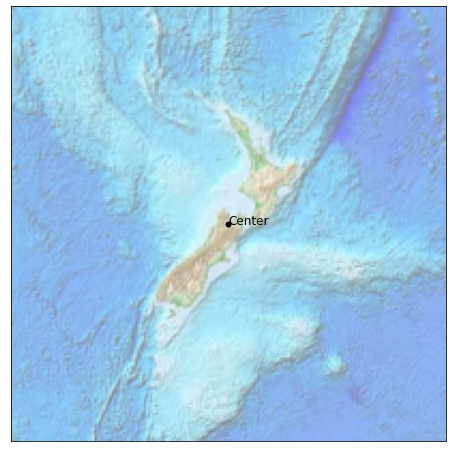

In [6]:
time_index = 0

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=3E6, height=3E6, 
            lat_0=-41.503675, lon_0=173,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(173, -41.503675)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Center', fontsize=12);

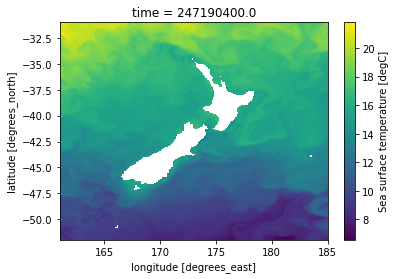

In [7]:
SFC.sst.isel(time=0).plot()

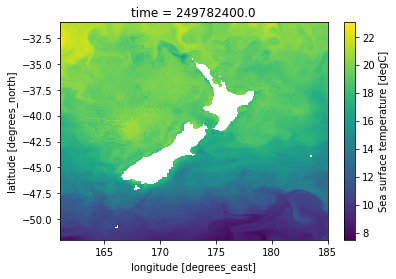

In [8]:
SFC.sst.isel(time=240).plot()

Plot time series at one place! (temporal)

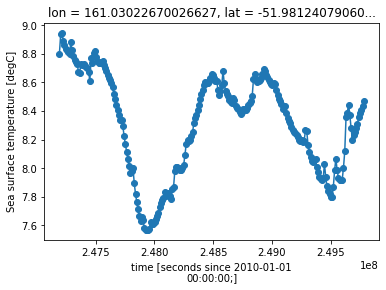

In [9]:
SFC.sst.isel(lat=0,lon=0).plot(marker="o")

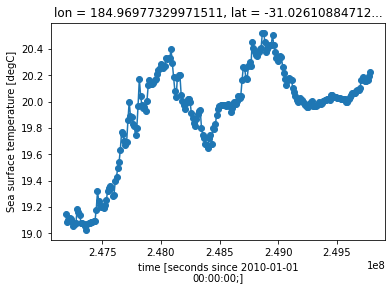

In [10]:
SFC.sst.isel(lat=466,lon=396).plot(marker="o")

In [11]:
MA = xr.open_dataset("/gdrive/MyDrive/monthly_avg_nz5km_avg_201711.nc", decode_times=False)

MA

<xarray.Dataset>
Dimensions:         (boundary: 4, eta_psi: 466, eta_rho: 467, eta_u: 467, eta_v: 466, ocean_time: 30, s_rho: 40, s_w: 41, tracer: 2, xi_psi: 396, xi_rho: 397, xi_u: 396, xi_v: 397)
Coordinates:
  * s_rho           (s_rho) float64 -0.9799 -0.9403 ... -0.01529 -0.004904
  * s_w             (s_w) float64 -1.0 -0.96 -0.9208 ... -0.02077 -0.01 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) float64 2.472e+08 2.473e+08 ... 2.497e+08
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          float64 ...
    nHIS            int32 ...
    ndefHIS         int32 ...
    nRST            int32 ...
    ntsAVG          int32 ...
    nAVG            int32 ...
    ndefAVG         int32 ...
    Falpha          float64 ...
    Fbeta           float64 ...
    Fgamma          float64 ...
    Akt_bak         (tracer) float64 ...
    Akv_bak         float64 ...
    Akk_bak         float64 ...
    Akp_bak         float64 ...
    rdrg            float64 ...
    rdrg2           float64 ...
    Zob             float64 ...
    Zos             float64 ...
    gls_p           float64 ...
    gls_m           float64 ...
    gls_n           float64 ...
    gls_cmu0        float64 ...
    gls_c1          float64 ...
    gls_c2          float64 ...
    gls_c3m         float64 ...
    gls_c3p         float64 ...
    gls_sigk        float64 ...
    gls_sigp        float64 ...
    gls_Kmin        float64 ...
    gls_Pmin        float64 ...
    Charnok_alpha   float64 ...
    Zos_hsig_alpha  float64 ...
    sz_alpha        float64 ...
    CrgBan_cw       float64 ...
    Znudg           float64 ...
    M2nudg          float64 ...
    M3nudg          float64 ...
    Tnudg           (tracer) float64 ...
    FSobc_in        (boundary) float64 ...
    FSobc_out       (boundary) float64 ...
    M2obc_in        (boundary) float64 ...
    M2obc_out       (boundary) float64 ...
    Tobc_in         (boundary, tracer) float64 ...
    Tobc_out        (boundary, tracer) float64 ...
    M3obc_in        (boundary) float64 ...
    M3obc_out       (boundary) float64 ...
    rho0            float64 ...
    gamma2          float64 ...
    LuvSrc          int32 ...
    LwSrc           int32 ...
    LtracerSrc      (tracer) int32 ...
    LsshCLM         int32 ...
    Lm2CLM          int32 ...
    Lm3CLM          int32 ...
    LtracerCLM      (tracer) int32 ...
    LnudgeM2CLM     int32 ...
    LnudgeM3CLM     int32 ...
    LnudgeTCLM      (tracer) int32 ...
    spherical       int32 ...
    xl              float64 ...
    el              float64 ...
    Vtransform      int32 ...
    Vstretching     int32 ...
    theta_s         float64 ...
    theta_b         float64 ...
    Tcline          float64 ...
    hc              float64 ...
    grid            int32 ...
    Cs_r            (s_rho) float64 ...
    Cs_w            (s_w) float64 ...
    h               (eta_rho, xi_rho) float64 ...
    f               (eta_rho, xi_rho) float64 ...
    pm              (eta_rho, xi_rho) float64 ...
    pn              (eta_rho, xi_rho) float64 ...
    angle           (eta_rho, xi_rho) float64 ...
    mask_rho        (eta_rho, xi_rho) float64 ...
    mask_u          (eta_u, xi_u) float64 ...
    mask_v          (eta_v, xi_v) float64 ...
    mask_psi        (eta_psi, xi_psi) float64 ...
    zeta            (ocean_time, eta_rho, xi_rho) float32 ...
    ubar_eastward   (ocean_time, eta_rho, xi_rho) float32 ...
 